In [1]:
import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view

#extracting images using metadata
metadata = "C:/Users/MACHINE/Documents/5th sem/covid/covid-chestxray-dataset-master/metadata.csv" # Meta info
imageDir = "C:/Users/MACHINE/Documents/5th sem/covid/covid-chestxray-dataset-master/images/" # Directory of covid images
outputDir = 'C:/Users/MACHINE/Documents/5th sem/covid/dataset/covid' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)
cnt=0
# loop over the rows of the COVID-19 data frame
#copies all files with covid-19 or sars and having view = PA from covid dataset
for (i, row) in metadata_csv.iterrows():
	if ((row["finding"]== "COVID-19" or row["finding"]== "SARS") and (row["view"] == "PA")):
            filename=row["filename"]
            image_path=os.path.join(imageDir,filename)
            #image_copy_path=os.path.join(outputDir,filename)
            shutil.copy2(image_path, outputDir)
            cnt += 1

print(cnt)

212


In [14]:
#Now we have to import normal images to the directory
import random
KAGGLE_FILE_PATH="C:/Users/MACHINE/Documents/5th sem/covid/chest_xray/chest_xray/test/NORMAL"
#filtered directory of normal xray
TARGET_NORMAL_DIR="C:/Users/MACHINE/Documents/5th sem/covid/dataset/normal"


In [15]:
#saves all the names of images in kaggle normal xray
image_names=os.listdir(KAGGLE_FILE_PATH)

In [16]:
len(image_names)

234

In [17]:
#now we need to copy 212 images since we have only 212 covid xrays available .in order to make dataset balanced
for i in range(cnt):
    image_name=image_names[i]
    image_path=os.path.join(KAGGLE_FILE_PATH,image_name)
    target_path=os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
 

In [18]:
#now that we have coppied all the images in the desired folder
#lets get our hands dirty

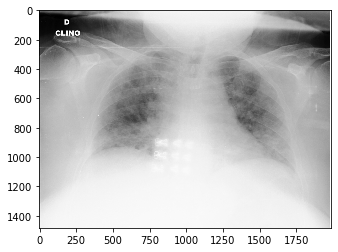

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#directory we created 
workingdir="C:/Users/MACHINE/Documents/5th sem/covid/dataset"
CATEGORIES=["covid","normal"]
for category in CATEGORIES:
    path=os.path.join(workingdir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap="gray")
        plt.show
        break
    break
    

In [20]:
img_array.shape

(1482, 1989, 3)

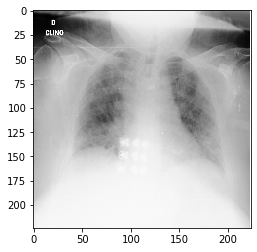

In [21]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [22]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(workingdir,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            
create_training_data()

    

In [23]:
print(len(training_data))

424


In [24]:
random.shuffle(training_data)


In [25]:
x=[]
y=[]


In [26]:
for features,label in training_data:
    x.append(features)
    y.append(label)
#x=np.array(x).reshape(-1,img_size,img_size,1) 


In [27]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_outy=open("y.pickle","wb")
pickle.dump(y,pickle_outy)
pickle_outy.close()
#saves the features


In [28]:
#loads the features

pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)
pickle_iny=open("y.pickle","rb")
y=pickle.load(pickle_iny)


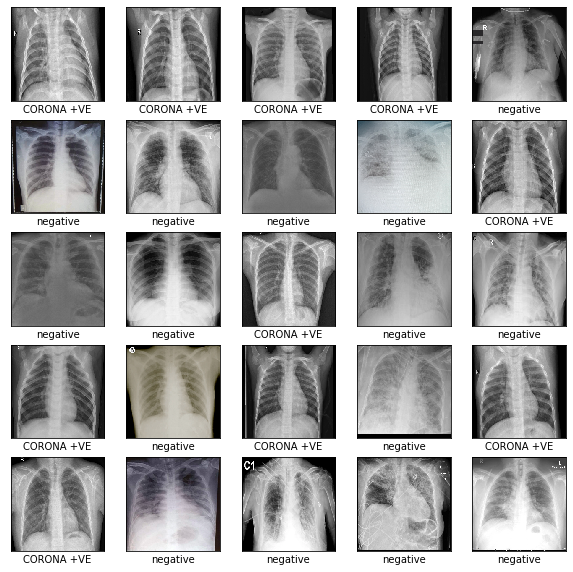

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(new_array[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.imshow(training_data[i][0],cmap='gray')
    if(training_data[i][1]==1):
        plt.xlabel("CORONA +VE")
    else:
        plt.xlabel("negative")
plt.show()
